<a href="https://colab.research.google.com/github/tanukhanna142/Python/blob/main/Comparative_Analysis_Statistical_vs_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Problem Statement & Overview

Fuel efficiency is a key factor in vehicle performance, impacting both sustainability and costs. This project builds a **Linear Regression Model** to predict fuel efficiency (**highway MPG**) using vehicle attributes. The dataset, sourced from **EPA** ([fueleconomy.gov](http://fueleconomy.gov)), includes models released annually from **1999 to 2008**.

We will analyze the statistical approach to linear regression, which prioritizes explainability and inference and compare it with the machine learning approach, which focuses on predictive accuracy and pattern recognition. The goal is to identify the appropriate scenarios for using each method, leveraging statistical models for their interpretability and machine learning models for their ability to handle complex, large-scale data and deliver accurate predictions.

##### Core Differences:

| Feature              | Statistical Models   | Machine Learning Models |
|----------------------|---------------------------|---------------------------|
| **Objective**        | Explanation & inference   | Prediction & pattern recognition |
| **Data Assumptions** | Requires assumptions     | No strict assumptions     |
| **Interpretability** | Highly interpretable     | Less interpretability     |
| **Scalability**      | Limited for large data   | Scales efficiently        |

##### Data Directory:
The dataframe with 234 rows and 11 variables, including
1. manufacturer,
2. model,
3. engine displacement - displ,
4. year,
5. number of cylinders - cyl,
6. transmission type - trans,
7. drive type - drv (f: front wheel; r: rear wheel & 4: 4wd),
8. city miles per gallon - cty,
9. fuel type - fl,  
10. vehicle class - class,
11. highway miles per gallon - hwy

#### Task 1: Getting Started
-set and check your current working directory in Python


In [ ]:
import os

## Get the working directory
print(os.getcwd())

/content


#### Task 2: Import Packages & Dataset

In [ ]:
## Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

! pip install tabulate
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
## Import the MPG.CSV dataset
data = pd.read_csv("Dataset_MPG.csv")

## Cloning the dataset
MPG_df = data.copy()

#### Task 3: Data Preprocessing


In [ ]:
## View and check the dimension of the dataset
print(MPG_df.shape)
## print(MPG_df.head())

## Check the internal structure of the data frame
print(MPG_df.info())

## Statistical Summary of the Numerical Columns
print(MPG_df.describe())

## Check & count missing values in the variables
print(f"Count of missing values column-wise: {MPG_df.isnull().sum()}")

## Check & count the exact duplicate rows
print(f"Total duplicate rows: {MPG_df.duplicated().sum()}")

(234, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB
None
       Unnamed: 0       displ         year         cyl         cty         hwy
count  234.000000  234.000000   234.000000  234.000000  234.000000  234.000000
mean   117.500000    3.471795  2003.500000    5.888889   

*Observations:*
- *The first column (Unnamed: 0) seems like an index column (may be unnecessary and can be dropped).*

- *No missing values & duplicate rows in the dataset.*

- *Some columns are categorical (manufacturer, model, trans, drv, fl, class), which might need encoding for machine learning.*

In [ ]:
## Drop the first column of the data frame
MPG_df = MPG_df.iloc[:,1:]
MPG_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
## Categorize the features depending on their datatype (int, float, object)
obj_cols = (MPG_df.dtypes == 'object')
obj_cols = list(obj_cols[obj_cols].index)
print("Categorical variables:",len(obj_cols))

## Unique value count of the categorical variables
for col in obj_cols:
    print(f"Unique values in {col}: {MPG_df[col].nunique()}")

int_cols = (MPG_df.dtypes == 'int')
num_cols = list(int_cols[int_cols].index)
print("Integer variables:",len(num_cols))
print(num_cols)

flt_cols = (MPG_df.dtypes == 'float')
flt_cols = list(flt_cols[flt_cols].index)
print("Float variables:",len(flt_cols))
print(flt_cols)

Categorical variables: 6
Unique values in manufacturer: 15
Unique values in model: 38
Unique values in trans: 10
Unique values in drv: 3
Unique values in fl: 5
Unique values in class: 7
Integer variables: 4
['year', 'cyl', 'cty', 'hwy']
Float variables: 1
['displ']


#### Task 4: Data Visualizations

In [ ]:
## Set the appearance of the plots
sns.set_theme(style="whitegrid", palette="muted")

1. Univariate Analysis: Understanding the data distribution


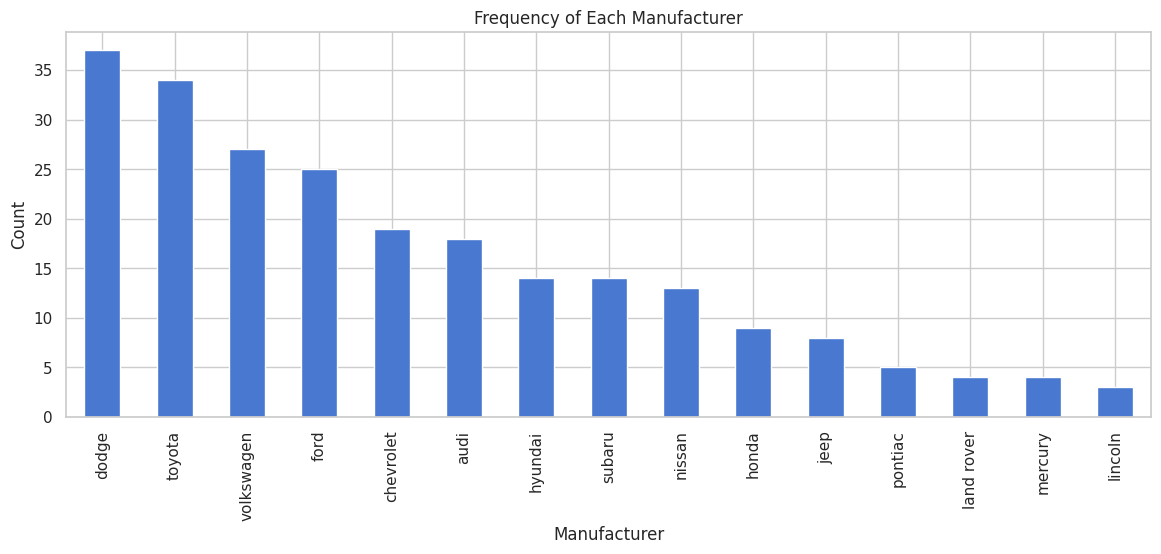

In [ ]:
## Bar chart - check the count of each manufacturer
manufacturer_counts = MPG_df['manufacturer'].value_counts()

plt.figure(figsize=(14, 5))
manufacturer_counts.plot(kind='bar')
plt.title('Frequency of Each Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=90)                                                         # Rotate x-axis labels for better readability
plt.show()

+----+----------------+------------------------+---------+
|    | manufacturer   | model                  |   count |
+====+================+========================+=========+
|  0 | audi           | a4 quattro             |       8 |
+----+----------------+------------------------+---------+
|  1 | audi           | a4                     |       7 |
+----+----------------+------------------------+---------+
|  2 | audi           | a6 quattro             |       3 |
+----+----------------+------------------------+---------+
|  3 | chevrolet      | c1500 suburban 2wd     |       5 |
+----+----------------+------------------------+---------+
|  4 | chevrolet      | corvette               |       5 |
+----+----------------+------------------------+---------+
|  5 | chevrolet      | malibu                 |       5 |
+----+----------------+------------------------+---------+
|  6 | chevrolet      | k1500 tahoe 4wd        |       4 |
+----+----------------+------------------------+--------

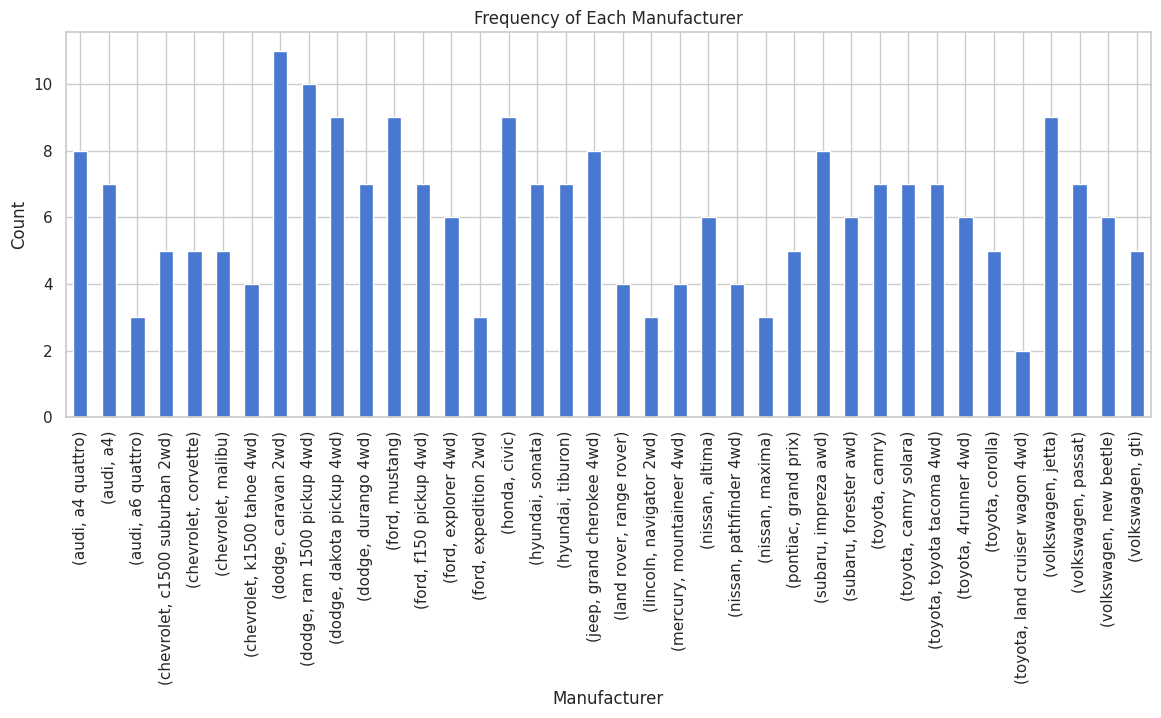

In [ ]:
# Group by 'manufacturer' and count the occurrences of each model within each manufacturer
model_counts = MPG_df.groupby('manufacturer')['model'].value_counts()

model_counts_df = model_counts.reset_index(name='count')
print(tabulate(model_counts_df, headers=["manufacturer", "model", "count"], tablefmt="grid"))

plt.figure(figsize=(14,5))
model_counts.plot(kind='bar')
plt.title('Frequency of Each Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

*Observations:*
- *Manufacturers (e.g., Dodge, Toyota, Volkswagen) are overrepresented, while others like Pontiac, Land Rover, Lincoln are underrepresented creating imbalance in dataset. By grouping models with low frequency under an "Other" category will reduce dimensionality and modeling more manageable.*
- *For manufacturers like Land Rover, Lincoln, and Mercury, the models appear less frequently (3 to 5 cars per model), indicating either rare models or less representation in the dataset.*
- *Certain models within these manufacturers dominate (e.g., Audi A4, Chevrolet Malibu, Dodge Caravan), while others appear less frequently.*

In [ ]:
## Grouping low frequency(less than a threshold) categories in manufacture & model with "other"
## Defining threshold
threshold = 5

## Replace rare manufacturer with "other"
MPG_df['manufacturer'] = MPG_df['manufacturer'].apply(
    lambda x: x if manufacturer_counts.get(x, 0) >= threshold else 'other'
)

## Replace rare model with "Other"
model_counts = MPG_df.groupby(['manufacturer', 'model']).size()
MPG_df['model'] = MPG_df.apply(
    lambda row: row['model'] if model_counts[(row['manufacturer'], row['model'])] >= threshold else 'other',
    axis=1
)

## Verify the changes
print(MPG_df.groupby('manufacturer')['model'].value_counts())
print(MPG_df['manufacturer'].value_counts())

manufacturer  model              
audi          a4 quattro              8
              a4                      7
              other                   3
chevrolet     c1500 suburban 2wd      5
              corvette                5
              malibu                  5
              other                   4
dodge         caravan 2wd            11
              ram 1500 pickup 4wd    10
              dakota pickup 4wd       9
              durango 4wd             7
ford          mustang                 9
              f150 pickup 4wd         7
              explorer 4wd            6
              other                   3
honda         civic                   9
hyundai       sonata                  7
              tiburon                 7
jeep          grand cherokee 4wd      8
nissan        other                   7
              altima                  6
other         other                  11
pontiac       grand prix              5
subaru        impreza awd             8
      

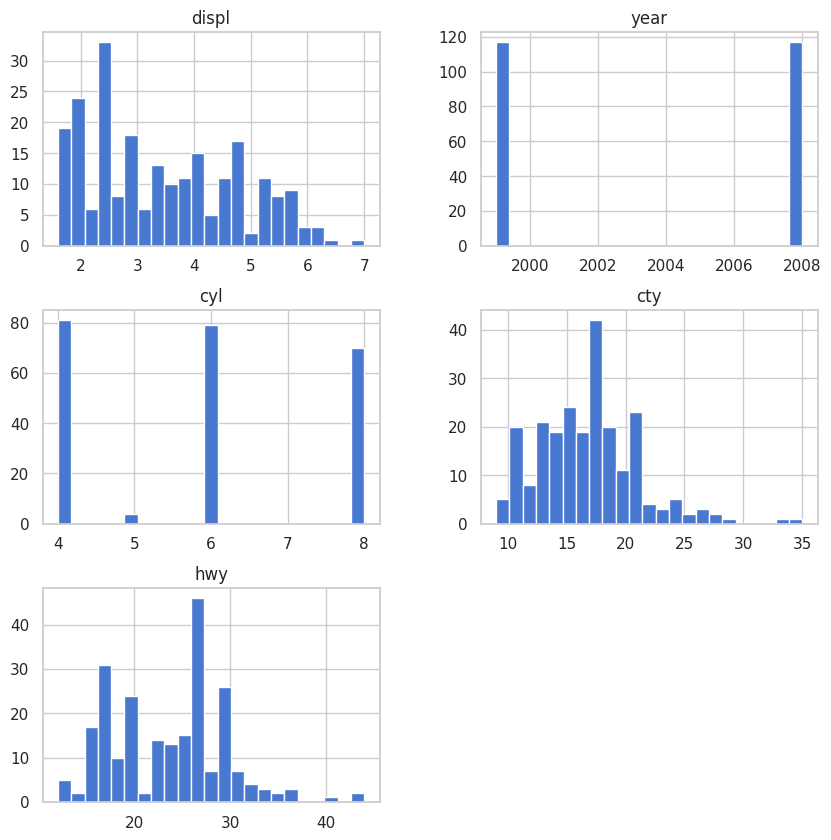

In [ ]:
## Histogram - checking distribution
MPG_df.hist(bins=23, figsize=(10, 10))
plt.show()

*Observations:*
- *displ - distribution is skewed to the right, indicates the smaller engine displacement dominate the dataset.*
- *year - the variable shows the bimodel distribution (could be treated as categorical).*
- *cty & hwy - slightly right skewed distribution, indicates that highway mileage correlates with city mileage but typically yields better performance.*
- *hwy - few vehicles have exceptionally high mileage (above 40mpg), which might be outliers.*

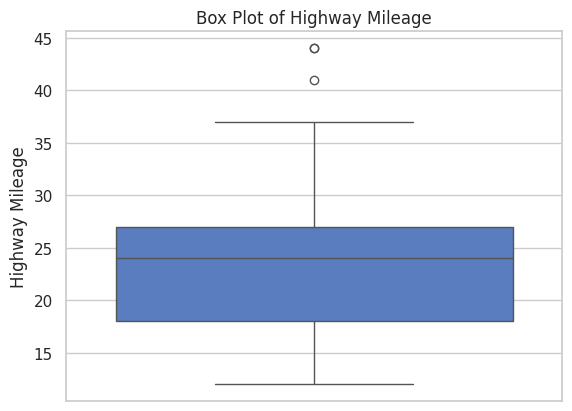

In [ ]:
## Box Plot - detecting outliers
sns.boxplot(y=MPG_df['hwy'])
plt.title('Box Plot of Highway Mileage')
plt.ylabel('Highway Mileage')
plt.show()

*Observation: there are two clear outliers above 40mgp, could be reviewed for validity & furthur investigation.*


2. Bivariate Analysis: Relationship between Independent & Dependent Variables

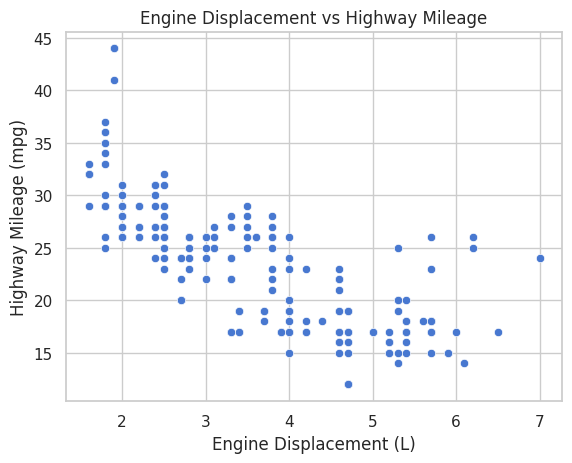

In [ ]:
## Scatter plot for the variables with displ on the x-axis & hwy on the y-axis
sns.scatterplot(x=MPG_df['displ'], y=MPG_df['hwy'])
plt.title('Engine Displacement vs Highway Mileage')
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Highway Mileage (mpg)')
plt.show()

*Observation: Larger engines lead to lower mileage.*



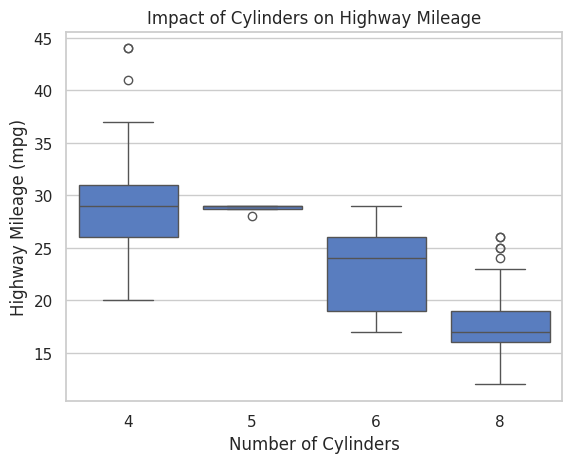

In [ ]:
## Box plot for the variables with cyl on the x-axis & hwy on the y-axis
sns.boxplot(x=MPG_df['cyl'], y=MPG_df['hwy'])
plt.xlabel("Number of Cylinders")
plt.ylabel("Highway Mileage (mpg)")
plt.title("Impact of Cylinders on Highway Mileage")
plt.show()

*Observations:*
- *As the number of cylinders increases, highway mileage decreases.*
- *Outliers may represent specific vehicles with unique characteristics (e.g., hybrid technology for 4-cylinder vehicles) or could indicate errors.*

3. Correlation Analysis

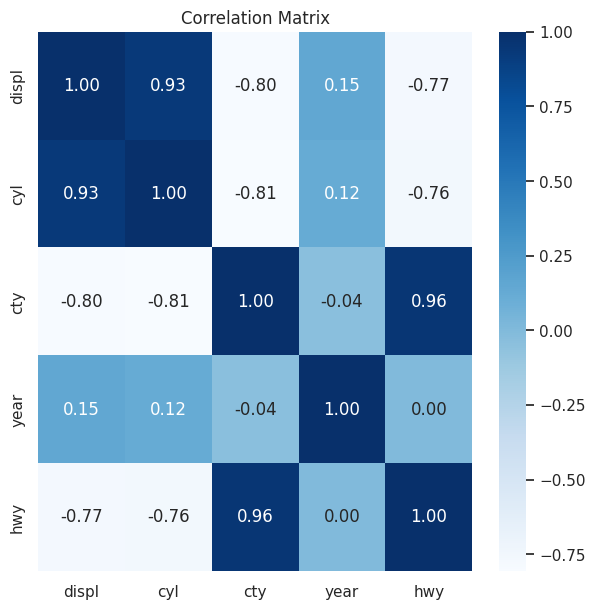

In [ ]:
## Plot the correlation matrix for all the numerical
plt.figure(figsize=(7,7))
sns.heatmap(MPG_df[['displ', 'cyl', 'cty', 'year', 'hwy']].corr(), fmt = '.2f', annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

*Observations:*
- *Engine displacement (displ) and the number of cylinders (cyl) are strongly correlated, indicating redundancy. Including both in a model might not add additional predictive power and could lead to multicollinearity issues.*
- *Mileage metrics (cty and hwy) are strongly positively correlated, suggesting these variables are closely related.*
- *Negative correlations between mileage (cty, hwy) and engine size(displ)/cylinders show that fuel efficiency decreases with larger engines or more cylinders.*
- *Correlations between (year, other features) is low, may not be adding much value and can be dropped.*

In [ ]:
## Drop the Variable 'year' & 'displ'
MPG_df = MPG_df.drop(['year', 'displ'], axis=1)
MPG_df.head()

,manufacturer,model,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,4,auto(l5),f,18,29,p,compact
1,audi,a4,4,manual(m5),f,21,29,p,compact
2,audi,a4,4,manual(m6),f,20,31,p,compact
3,audi,a4,4,auto(av),f,21,30,p,compact
4,audi,a4,6,auto(l5),f,16,26,p,compact


#### Task 5: Feature Engineering

1. Encoding Categorical Variables

Encoding categorical variables is a technique used to convert categorical data into a format that can be provided to machine learning algorithms to improve model performance.

In [ ]:
## Selecting the categorical variables
categorical_df = MPG_df.select_dtypes(include=['object'])
# print(categorical_df.head())

## One Hote Encoding converts a CV into a set of binary (0 or 1) columns and drops one of the categories to avoid the dummy variable trap
## Choose this so as to avoid multicollinearity issues in regression models
categorical_df_fnl = pd.get_dummies(categorical_df , drop_first=True).astype(int)
categorical_df_fnl.head()

,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_nissan,manufacturer_other,manufacturer_pontiac,manufacturer_subaru,...,fl_d,fl_e,fl_p,fl_r,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


2. Normalizing Numerical Variables

In [ ]:
## Selecting the numerical variables
numerical_df = MPG_df.select_dtypes(include=['number'])

## Drop the target variable from NV
numerical_df = numerical_df.drop(['hwy'], axis=1)
# print(numerical_df.head())

## Feature scaling transform numerical features so they fit within a specific scale or range, helps to ensure that each feature contributes proportionately to the model
## Using Z score standardisation as dataset contains outliers (Z-score standardization is more robust to outliers than Min-Max)
scaler = StandardScaler()
numerical_df.columns = numerical_df.columns.astype(str)                                       # Convert all column names to strings
numerical_df_fnl = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)
numerical_df_fnl.head()

,cyl,cty
0,-1.174618,0.268676
1,-1.174618,0.975084
2,-1.174618,0.739614
3,-1.174618,0.975084
4,0.069095,-0.202262


In [ ]:
print(categorical_df_fnl.shape)
print(numerical_df_fnl.shape)

(234, 62)
(234, 2)


#### Task 6: Model Building

In [ ]:
## Defining independant variables for modelling
## Combine numerical and categorical variables for modelling
X_all = pd.concat([numerical_df_fnl, categorical_df_fnl], axis=1)

print(X_all.shape)
# print(X_all.head())

## Defining target variable for modelling
y = MPG_df['hwy']

print(y.shape)
# print(y.head())

(234, 64)
(234,)


In [ ]:
## Split the dataset into training & test sets
## Data is split into 80% train & 20% test
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=23)

#### Statistical Approach

1. Initial step of fitting Ordinary Least Square Model

In [ ]:
## Add constant for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

## Fit statistical - linear regression model
model_OLS = sm.OLS(y_train, X_train_const).fit()

## Print the model summary
print(model_OLS.summary())

# Predict using statistical model
y_pred_OLS = model_OLS.predict(X_test_const)

# Evaluate statistical model
mse_OLS = mean_squared_error(y_test, y_pred_OLS)
r2_OLS = r2_score(y_test, y_pred_OLS)

# Print the result
OLS_result = [["Mean Square Error (MSE)", mse_OLS],["R-squared", r2_OLS]]
print(tabulate(OLS_result, headers=["Metric", "Value"], tablefmt="grid"))

                            OLS Regression Results                            
Dep. Variable:                    hwy   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     127.8
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.87e-92
Time:                        03:18:53   Log-Likelihood:                -230.47
No. Observations:                 187   AIC:                             568.9
Df Residuals:                     133   BIC:                             743.4
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

2. Check the Model Assumptions

Before proceeding to feature selection, one should check the model assumptions to ensure thy hold True.

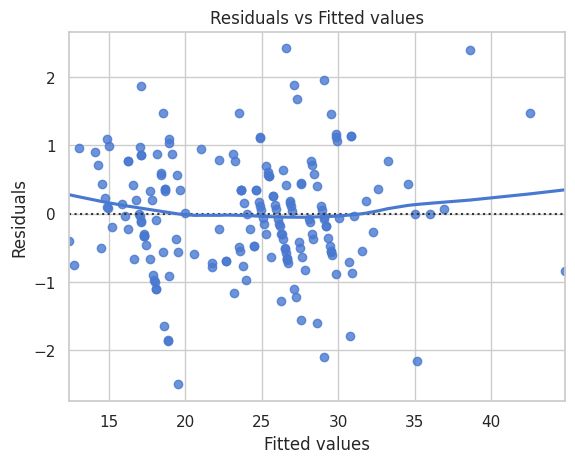

In [ ]:
## Linearity & Homoscedasticity: residuals vs fitted values plot
sns.residplot(x=model_OLS.fittedvalues, y=model_OLS.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

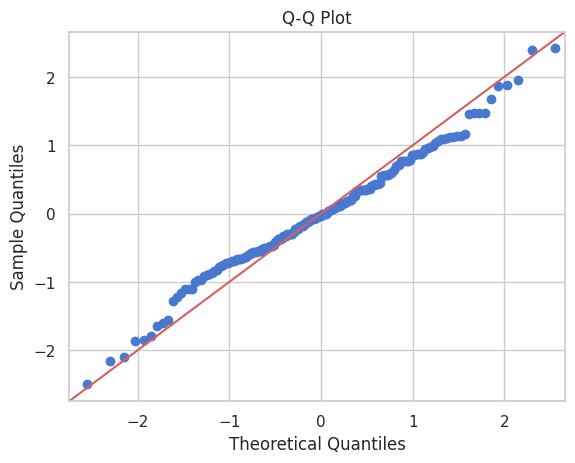

In [ ]:
# Normality: Q-Q Plot to check for normality of errors
sm.qqplot(model_OLS.resid, line='45')
plt.title('Q-Q Plot')
plt.show()

In [ ]:
##  Multicollinearity: Variance Inflation Factor (VIF)
## VIF 1 indicates no multicollinearity, while values above 5 or 10 suggest significant issues
## Infinite VIF means perfect multicollinearity, where a variable is fully dependent on others

## Function to calculate VIF
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = X.columns
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_df

## Compute VIF
vif_result = calculate_vif(X_train_const)

## Print VIF results in a tabular format
print(tabulate(vif_result, headers="keys", tablefmt="grid"))

+----+---------------------------+-----------+
|    | Variable                  |       VIF |
+====+===========================+===========+
|  0 | const                     |   0       |
+----+---------------------------+-----------+
|  1 | cyl                       |   7.58073 |
+----+---------------------------+-----------+
|  2 | cty                       |  14.1877  |
+----+---------------------------+-----------+
|  3 | manufacturer_chevrolet    | inf       |
+----+---------------------------+-----------+
|  4 | manufacturer_dodge        | inf       |
+----+---------------------------+-----------+
|  5 | manufacturer_ford         | inf       |
+----+---------------------------+-----------+
|  6 | manufacturer_honda        | inf       |
+----+---------------------------+-----------+
|  7 | manufacturer_hyundai      | inf       |
+----+---------------------------+-----------+
|  8 | manufacturer_jeep         | inf       |
+----+---------------------------+-----------+
|  9 | manufa

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


*Observations*
- *A scatter plot with residuals randomly dispersed around the central zero line suggests that the model performs well and maintains homoscedasticity. However, a few points positioned far from the cluster may indicate outliers.*
- *In a Q-Q (Quantile-Quantile) plot, if the residuals follow a normal distribution, the points should align closely with the 45-degree reference line. However, extreme data points may distort the results.*
- *The VIF results indicate strong multicollinearity, especially among continuous variables (displ, cyl, cty) and perfect multicollinearity in categorical variables. To improve the model, reduce multicollinearity by adjusting predictors, refining categorical encoding, or applying regularisation.*


3. Eliminating Variables Based on VIF and Correlation Analysis

In [ ]:
## Identify columns with VIF = ∞ & drop them
vif_high = vif_result[vif_result["VIF"] == float('inf')]["Variable"].values
X_all = X_all.drop(columns=vif_high)
X_train = X_train.drop(columns=vif_high)
X_test = X_test.drop(columns=vif_high)
print(X_all.shape)
print(X_train.shape)
print(X_test.shape)

## Recompute VIF for the updated data
vif_result = calculate_vif(X_all)
# print(tabulate(vif_result, headers="keys", tablefmt="grid"))

## Identify columns with VIF > 10 & drop them
vif_high = vif_result[vif_result["VIF"] > 10]["Variable"].values
X_all = X_all.drop(columns=vif_high)
X_train = X_train.drop(columns=vif_high)
X_test = X_test.drop(columns=vif_high)
print(X_all.shape)
print(X_train.shape)
print(X_test.shape)

## Recompute VIF for the updated data
vif_result = calculate_vif(X_all)
print(tabulate(vif_result, headers="keys", tablefmt="grid"))

(234, 21)
(187, 21)
(47, 21)
+----+--------------------------+---------+
|    | Variable                 |     VIF |
+====+==========================+=========+
|  0 | cyl                      | 3.94421 |
+----+--------------------------+---------+
|  1 | cty                      | 5.01093 |
+----+--------------------------+---------+
|  2 | model_a4 quattro         | 1.13078 |
+----+--------------------------+---------+
|  3 | model_altima             | 1.07807 |
+----+--------------------------+---------+
|  4 | model_c1500 suburban 2wd | 1.32917 |
+----+--------------------------+---------+
|  5 | model_camry              | 1.04398 |
+----+--------------------------+---------+
|  6 | model_camry solara       | 1.27159 |
+----+--------------------------+---------+
|  7 | model_corolla            | 1.33963 |
+----+--------------------------+---------+
|  8 | model_explorer 4wd       | 1.10125 |
+----+--------------------------+---------+
|  9 | model_malibu             | 1.02091 |
+--

In [ ]:
## Compute the correlation matrix
corr_matrix = X_all.corr()

## Create a mask for the upper triangle (since correlation matrix is symmetric)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

## Set a threshold for correlation to consider as "highly correlated"
threshold = 0.7

## Find highly correlated pairs
high_corr_pairs = []

## Loop through the correlation matrix and extract pairs above the threshold
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

## Print the highly correlated pairs
for var1, var2, corr_value in high_corr_pairs:
    print(f"Variables: {var1} and {var2}, Correlation: {corr_value:.2f}")

Variables: cty and cyl, Correlation: -0.81


In [ ]:
## Train Stats OLS Model again
## Add constant for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

## Fit statistical - linear regression model
model_OLS = sm.OLS(y_train, X_train_const).fit()

## Print the model summary
print(model_OLS.summary())

## Predict using statistical model
y_pred_OLS = model_OLS.predict(X_test_const)

## Evaluate statistical model
mse_OLS = mean_squared_error(y_test, y_pred_OLS)
r2_OLS = r2_score(y_test, y_pred_OLS)

## Print the result
OLS_result = [["Mean Square Error (MSE)", mse_OLS],["R-squared", r2_OLS]]
print(tabulate(OLS_result, headers=["Ordinary Least Square", "Value"], tablefmt="grid"))

                            OLS Regression Results                            
Dep. Variable:                    hwy   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     122.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           3.96e-89
Time:                        03:27:21   Log-Likelihood:                -337.36
No. Observations:                 187   AIC:                             718.7
Df Residuals:                     165   BIC:                             789.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

*Observations:*
- *If the goal is pure prediction accuracy, go with the original model as it has the higher R-squared, lower MSE, lower AIC and BIC.*
- *If the goal is interpretability and avoiding overfitting, the remodeled model is a better choice since it removes unnecessary predictors (high p-values) and reduces multicollinearity.
- *Going with the reduced model (21 features) to avoids unnecessary complexity and helps prevent overfitting, which is crucial when applying Lasso and Ridge Regression.*

#### Machine Learning Approach

In [ ]:
# Fit machine learning - linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Predict using machine learning model
y_pred_LR = model_LR.predict(X_test)

# Evaluate machine learning model
mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

## Print the result
LR_result = [["Mean Square Error (MSE)", mse_LR],["R-squared", r2_LR]]
print(tabulate(LR_result, headers=["Linear Regression", "Value"], tablefmt="grid"))

+-------------------------+----------+
| Linear Regression       |    Value |
+=========================+==========+
| Mean Square Error (MSE) | 2.99744  |
+-------------------------+----------+
| R-squared               | 0.892994 |
+-------------------------+----------+


#### Advance Machine Learning Techniques

In [ ]:
## Ridge Regression
model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_train, y_train)
y_pred_Ridge = model_Ridge.predict(X_test)

## Print the result
Ridge_result = [
    ["Mean Square Error (MSE)", mean_squared_error(y_test, y_pred_Ridge)],
    ["R-squared", r2_score(y_test, y_pred_Ridge)]
]
print(tabulate(Ridge_result, headers=["Ridge", "Value"], tablefmt="grid"))

## Lasso Regression
model_Lasso = Lasso(alpha=0.1)
model_Lasso.fit(X_train, y_train)
y_pred_Lasso = model_Lasso.predict(X_test)

## Print the result
Lasso_result = [
    ["Mean Square Error (MSE)", mean_squared_error(y_test, y_pred_Lasso)],
    ["R-squared", r2_score(y_test, y_pred_Lasso)]
]
print(tabulate(Lasso_result, headers=["Lasso", "Value"], tablefmt="grid"))

+-------------------------+----------+
| Ridge                   |    Value |
+=========================+==========+
| Mean Square Error (MSE) | 2.90745  |
+-------------------------+----------+
| R-squared               | 0.896206 |
+-------------------------+----------+
+-------------------------+----------+
| Lasso                   |    Value |
+=========================+==========+
| Mean Square Error (MSE) | 3.09911  |
+-------------------------+----------+
| R-squared               | 0.889364 |
+-------------------------+----------+


#### Task 7: Comparision of approaches

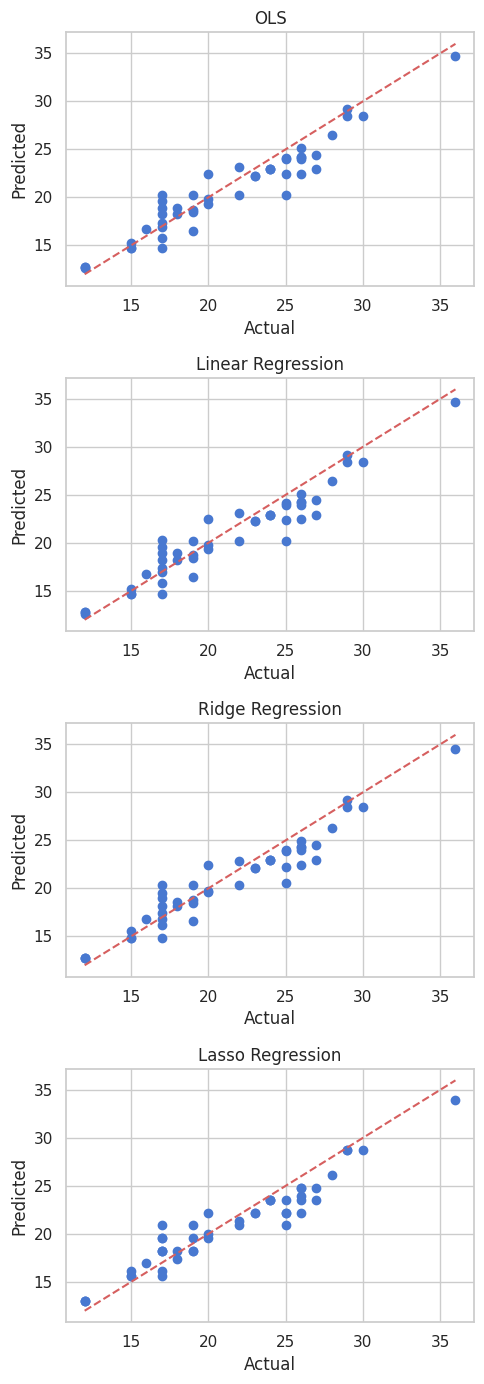

In [52]:
## Scatter plots for actual vs predicted values
plt.figure(figsize=(5,14))

plt.subplot(411)
plt.scatter(y_test, y_pred_OLS)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("OLS")

plt.subplot(412)
plt.scatter(y_test, y_pred_LR)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression")

plt.subplot(413)
plt.scatter(y_test, y_pred_Ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ridge Regression")

plt.subplot(414)
plt.scatter(y_test, y_pred_Lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='perfect fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Lasso Regression")

plt.tight_layout()
plt.show()

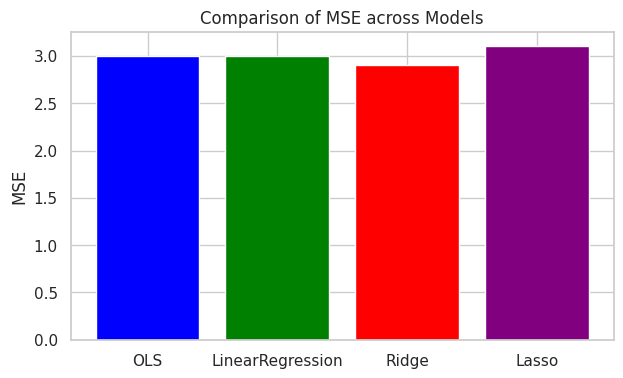

+-------------------------+----------+---------------------+----------+----------+
| Metric                  |      OLS |   Linear Regression |    Ridge |    Lasso |
+=========================+==========+=====================+==========+==========+
| Mean Square Error (MSE) | 2.99744  |            2.99744  | 2.90745  | 3.09911  |
+-------------------------+----------+---------------------+----------+----------+
| R-squared               | 0.892994 |            0.892994 | 0.896206 | 0.889364 |
+-------------------------+----------+---------------------+----------+----------+


In [45]:
## Plot Mean Square Error (MSE) comparison
models = ['OLS', 'LinearRegression', 'Ridge', 'Lasso']
mse_values = [mse_OLS, mse_LR, mean_squared_error(y_test, y_pred_Ridge), mean_squared_error(y_test, y_pred_Lasso)]

plt.figure(figsize=(7,4))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("MSE")
plt.title("Comparison of MSE across Models")
plt.show()

## Combine results into a single comparison table
comparison_results = [
    ["Metric", "OLS", "Linear Regression", "Ridge", "Lasso"],
    ["Mean Square Error (MSE)", OLS_result[0][1], LR_result[0][1], Ridge_result[0][1], Lasso_result[0][1]],
    [" R-squared ", OLS_result[1][1], LR_result[1][1], Ridge_result[1][1], Lasso_result[1][1]],
]

# Print comparison table
print(tabulate(comparison_results, headers="firstrow", tablefmt="grid"))

*Observations:*
- *Ridge Regression has the best balance, achieving the lowest error and highest R² Score.*
- *Though Lasso reduces feature coefficients, it increases error slightly, making it less effective here.*
- *OLS vs. Linear Regression: Both perform identically, showing that regularization does not impact basic linear models.*